# Prediction of Breast cancer wisconsin data

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import confusion_matrix
data = pd.read_csv('/Users/raviranjansingh/Documents/02_fall/MSBA6420_predictive_analytics/breast-cancer-wisconsin.csv')
data.drop("Sample_code_number",axis=1,inplace=True)

After importing the data, I mapped the Target variable "Class" as 2 - 1 & 4 -0 so that we can have binary output variable. Also cleaned the data by deleting the rows that contained '?' .

In [3]:
data['Class']=data['Class'].map({2:1,4:0})
## remove Na's '?'
data = data.replace("?", value = np.nan).dropna()

Now we split our data set into training set (70%) and test data set (30%) 

In [4]:
train, test = train_test_split(data, test_size = 0.3)# data split
# we can check their dimension
print(train.shape)
print(test.shape)

prediction_var = ['Clump_Thickness','Uniformity_Cell_Size','Uniformity_Cell_Shape'\
                  ,' Marginal_Adhesion','Single_Epithelial_Cell_Size', \
                  'Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli ','Mitoses ']

## seperating the data into train and test

train_X = train[prediction_var]# taking the training data input 
train_y=train.Class# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.Class   #output 



(478, 10)
(205, 10)


#### For assessing the model performance I have created a function which not only calculates the accuracy and error rate, it also gives the K Fold Cross-validation accuracy.

In [5]:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:],data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])

## Fitting the Decision Tree Model

In [6]:
model = DecisionTreeClassifier()
outcome_var= 'Class'
classification_model(model,data,prediction_var,outcome_var)
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)#
from sklearn.metrics import classification_report
print(classification_report(test_y, prediction))

Accuracy : 100.000%
Cross-Validation Score : 88.321%
Cross-Validation Score : 91.241%
Cross-Validation Score : 91.241%
Cross-Validation Score : 92.879%
Cross-Validation Score : 92.980%
             precision    recall  f1-score   support

          0       0.93      0.86      0.89        73
          1       0.93      0.96      0.94       132

avg / total       0.93      0.93      0.93       205



We can see that accuarcy is 100% but the cross validation scores are not as good as the model accuarcy on the training data set.
Precison , Recall & F measure looks good.
### However we will use Grid Search CV from sklearn package to come up with the best parameters, to take care of the over fittig problem.

In [7]:
def Classification_model_gridsearchCV(model,param_grid,data_X,data_y):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    # this is how we use grid serch CV we are giving our model
    # the we gave parameters those we want to tune
    # Cv is for cross validation
    # scoring means to score the classifier
    
    clf.fit(train_X,train_y)
    print("The best parameter found on development set is :")
    # this will gie us our best parameter to use
    print(clf.best_params_)
    print("the bset estimator is ")
    print(clf.best_estimator_)
    print("The best score is ")
    # this is the best score that we can achieve using these parameters
    print(clf.best_score_)
    
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],\
              'min_samples_split': [2,3,4,5,6,7,8,9,10],\
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }
data_X= data[prediction_var]
data_y= data["Class"]

# here our gridasearchCV will take all combinations of these
##parameter and apply it to model 
# and then it will find the best parameter for model

model= DecisionTreeClassifier()
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 9}
the bset estimator is 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=9, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
The best score is 
0.966527196653


Using these best parameters we will run our model again and check teh perfromance using K fold and also see other evaluation parameters to comapre it with our earlier model.

In [8]:
model =DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
prediction_var = ['Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',\
                  ' Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',\
                  'Bland_Chromatin', 'Normal_Nucleoli ', 'Mitoses ']
outcome_var= 'Class'
classification_model(model,data,prediction_var,outcome_var)
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)#output value of test dat
from sklearn.metrics import classification_report
print(classification_report(test_y, prediction))

Accuracy : 98.389%
Cross-Validation Score : 90.511%
Cross-Validation Score : 92.336%
Cross-Validation Score : 92.944%
Cross-Validation Score : 93.789%
Cross-Validation Score : 94.443%
             precision    recall  f1-score   support

          0       0.96      0.93      0.94        73
          1       0.96      0.98      0.97       132

avg / total       0.96      0.96      0.96       205



#### We see that our model performance on Kfolds have increased from 92% to 94%, which is pretty good.
#### Hence we can say that we have come up with our best Decision tree model by pruning the parameters.

### Now we will plot our ROC curve and lift curve to see how our model is performing apart from evaluating the precison, recall, f-measure and accuracy metrics.

In [9]:
import scipy
import os
import glob
import sys
import pylab
import random 
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pandas import Series
from sklearn.metrics import roc_curve, auc


def gini(actual,pred,weight=None):
    pdf= pd.DataFrame(scipy.vstack([actual,pred]).T,columns=['Actual','Predicted'],)
    pdf= pdf.sort_values('Predicted',ascending = False)
    if weight is None:
        pdf['Weight'] = 1.0
  
    pdf['CummulativeWeight'] = np.cumsum(pdf['Weight'])
    pdf['CummulativeWeightedActual'] = np.cumsum(pdf['Actual']*pdf['Weight'])
    TotalWeight = sum(pdf['Weight'])
    Numerator = sum(pdf['CummulativeWeightedActual']*pdf['Weight'])
    Denominator = sum(pdf['Actual']*pdf['Weight']*TotalWeight)
    Gini = 1.0 - 2.0 * Numerator/Denominator
    return Gini 

def mylift(actual,pred,weight=None,n=10,xlab='Predicted Decile',\
           MyTitle='Model Performance Lift Chart'):

    import matplotlib.pyplot as plt
    plt.style.use('ggplot')
    actual = test_y
    pred = prediction
    
    n = 10
    actual = test_y.reset_index(drop = True)
    pdf1= pd.concat([actual,Series(prediction)],axis=1)
    pdf1.columns = ['Actual','Predicted']
    pdf = pdf1.sort_values('Predicted',ascending = False)
    pdf['Weight'] = 1.0
      
    pdf['CummulativeWeight'] = np.cumsum(pdf['Weight'])
    pdf['CummulativeWeightedActual'] = np.cumsum(pdf['Actual']*pdf['Weight'])
    TotalWeight = sum(pdf['Weight'])
    Numerator = sum(pdf['CummulativeWeightedActual']*pdf['Weight'])
    Denominator = sum(pdf['Actual']*pdf['Weight']*TotalWeight)
    Gini = 1.0 - 2.0 * Numerator/Denominator
    NormalizedGini = Gini/ gini(pdf['Actual'],pdf['Actual'])
    GiniTitle = 'Normalized Gini = '+ str(round(NormalizedGini,4))
        
    pdf['PredictedDecile'] = np.round(pdf['CummulativeWeight']*n /TotalWeight + 0.5,decimals=0)
    pdf['PredictedDecile'][pdf['PredictedDecile'] < 1.0] = 1.0
    pdf['PredictedDecile'][pdf['PredictedDecile'] > n] = n 
        
    pdf['WeightedPrediction'] = pdf['Predicted']*pdf['Weight']
    pdf['WeightedActual'] = pdf['Actual']*pdf['Weight']
    lift_df = pdf.groupby('PredictedDecile').agg({'WeightedPrediction': np.sum,\
            'Weight':np.sum,'WeightedActual':np.sum,'PredictedDecile':np.size})
    nms = lift_df.columns.values
    nms[1] = 'Count'
    lift_df.columns = nms
    lift_df['AveragePrediction'] = lift_df['WeightedPrediction']/pdf['Weight']
    lift_df['AverageActual'] = lift_df['WeightedActual']/pdf['Weight']
    lift_df['AverageError'] = lift_df['AverageActual']/lift_df['AveragePrediction']
        
    d = pd.DataFrame(lift_df.index)
    p = lift_df['AveragePrediction']
    a = lift_df['AverageActual']
    
    plt.plot(d,p,label='Predicted',color='blue',marker='o')
    plt.plot(d,a,label='Actual',color='red',marker='d')
    pylab.legend(['Predicted','Actual'])
    pylab.title(MyTitle +'\n'+GiniTitle)
    pylab.xlabel(xlab)
    pylab.ylabel('Actual vs. Predicted')
    pylab.grid()
    pylab.show()
    
def roc_plot(actual, pred, ttl):
    fpr, tpr, thresholds = roc_curve(actual, pred)
    roc_auc = auc(fpr, tpr)
    print("The Area Under the ROC Curve : %f" % roc_auc)
    # Plot ROC curve
    plt.clf()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    #plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
    #plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.plot([0, 1], [0, 1], 'k',linestyle='--',color='navy')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve'+'\n'+ttl)
    plt.legend(loc="lower right")
    plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


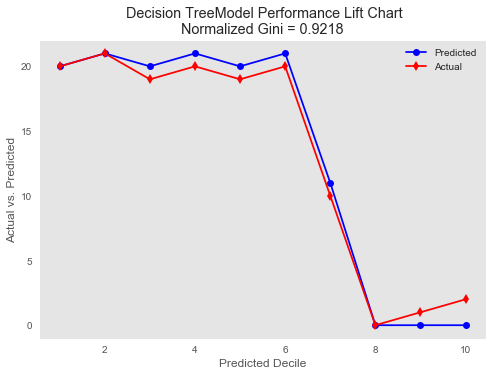

The Area Under the ROC Curve : 0.954390


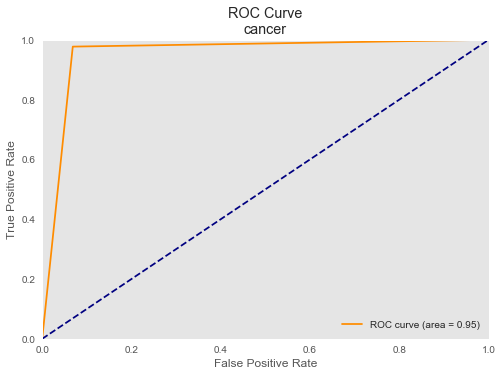

In [10]:
mylift(test_y, prediction,weight=None,n=10,xlab='Predicted Decile',\
       MyTitle=' Decision TreeModel Performance \
Lift Chart')
roc_plot(test_y, prediction, 'cancer')

## Fitting KNN 

In [11]:
model = KNeighborsClassifier()

outcome_var= 'Class'
classification_model(model,data,prediction_var,outcome_var)
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)#
from sklearn.metrics import classification_report
print(classification_report(test_y, prediction))


Accuracy : 97.950%
Cross-Validation Score : 93.431%
Cross-Validation Score : 95.255%
Cross-Validation Score : 95.620%
Cross-Validation Score : 96.164%
Cross-Validation Score : 96.784%
             precision    recall  f1-score   support

          0       0.99      0.93      0.96        73
          1       0.96      0.99      0.98       132

avg / total       0.97      0.97      0.97       205



The Cross validation scores are better than that of Decision Tree and also the F1 measure is better than Decsion tree for fraud prediction. 

### Now let's see if we can improve our model performance using grid searchCV tool kit.

In [12]:
param_grid = [{'n_neighbors': list(range(1,21)),'weights': ['uniform','distance']}]
data_X= data[prediction_var]
data_y= data["Class"]
# here our gridasearchCV will take all combinations of these parameter and apply it to model 
# and then it will find the best parameter for model
model= KNeighborsClassifier()
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'n_neighbors': 4, 'weights': 'uniform'}
the bset estimator is 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')
The best score is 
0.97489539749


In [13]:
model = KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

prediction_var = ['Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',\
                  ' Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',\
                  'Bland_Chromatin', 'Normal_Nucleoli ', 'Mitoses ']
outcome_var= 'Class'
classification_model(model,data,prediction_var,outcome_var)
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)#
from sklearn.metrics import classification_report
print(classification_report(test_y, prediction))

Accuracy : 98.243%
Cross-Validation Score : 93.431%
Cross-Validation Score : 94.526%
Cross-Validation Score : 95.377%
Cross-Validation Score : 95.981%
Cross-Validation Score : 96.491%
             precision    recall  f1-score   support

          0       0.97      0.99      0.98        73
          1       0.99      0.98      0.99       132

avg / total       0.99      0.99      0.99       205



#### We see that model performance has improved significanlty in terms of F1- measure from .97 to .98 in terms of fraud capturing.
### Now lets plot ROC and Lift curve to check the performance metrics apart from othe evalucation criteria.

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


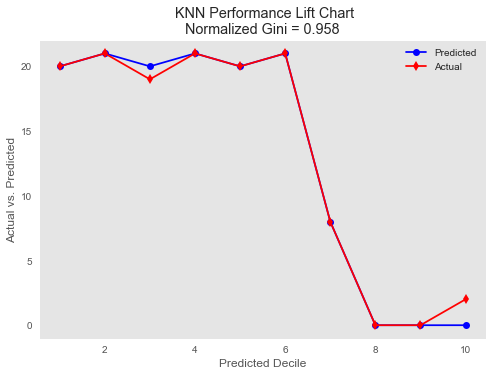

The Area Under the ROC Curve : 0.985575


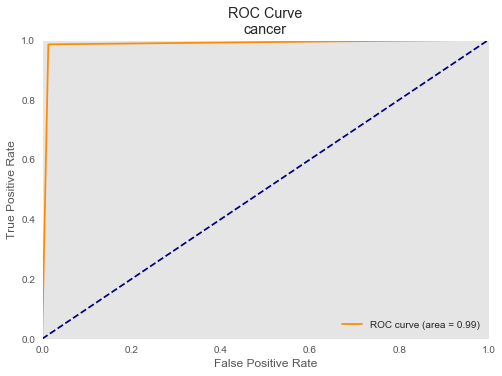

In [14]:
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)#output value of test dat
mylift(test_y, prediction,weight=None,n=10,xlab='Predicted Decile',\
       MyTitle=' KNN Performance Lift Chart')
roc_plot(test_y, prediction, 'cancer')

# Comparison of Decision Tree and KNN algorithm

## We see that the area under ROC curve for KNN algorithm is .98 which is slighlty higher that .97 which is given by Decision Tree algorithm.


Reference:

https://www.kaggle.com/gargmanish/basic-machine-learning-with-cancer/notebook

https://github.com/franciscojavierarceo/Python/blob/master/My_Functions.py